# Exercise 2 - Part 1
## Implementing 3 models for the association between a single SNP and a quantitative trait
### - Chosen phenotype: ```Infectious disease, immune function: H5N1 influenza A virus mortality rate 30 days after infection (Boon-Webby Trait 1) [% death]```
### - Chosen SNP: ```rs13476293```


####  Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#### Defining input and output paths

In [2]:
input_path = ('/Users/shanishalev/Library/CloudStorage'
              '/OneDrive-Personal/Documents - one drive/Biology TAU'
              '/Year no 03/semester B/personal_medicine_course/hw_2/data/')
output_path = ('/Users/shanishalev/Library/CloudStorage/OneDrive-Personal/'
               'Documents - one drive/Biology TAU/Year no 03/semester B/'
               'personal_medicine_course/hw_2/outputs/')

#### Reading the data
##### Genotypes

In [3]:
gen = pd.read_excel(input_path+'genotypes_1.xlsx')
gen.head()

,Locus,Chr_Build37,Build37_position,BXD1,BXD2,BXD5,BXD6,BXD8,BXD9,BXD11,...,BXD96,BXD97,BXD98,BXD99,BXD100,BXD101,BXD102,BXD103,check hetrozygoty,number of hetero
0,rs6269442,1,3482276,B,B,D,D,D,B,B,...,B,B,B,B,B,U,U,U,Contains H,6
1,rs6365999,1,4811063,B,B,D,D,D,B,B,...,B,B,B,B,B,U,U,U,Contains H,6
2,rs6376963,1,5008090,B,B,D,D,D,B,B,...,B,B,B,B,B,U,U,U,Contains H,6
3,rs3677817,1,5176059,B,B,D,D,D,B,B,...,B,B,B,B,B,U,U,U,Contains H,5
4,rs8236463,1,5579194,B,B,D,D,D,B,D,...,B,B,B,B,B,U,U,U,Contains H,5


##### Phenotypes

In [4]:
phen = pd.read_excel(input_path+'phenotypes_1.xlsx')
phen.head()

,index,Phenotype,Authors,Year,Pubmed Id,C57BL/6J,DBA/2J,BXD1,BXD2,BXD5,...,BXD95,BXD96,BXD97,BXD98,BXD99,BXD100,BXD101,BXD102,BXD103,count strains with values
0,0,Cerebellum weight [mg],"Airey DC, Lu L, Williams RW",2001.0,11438585.0,NaN,NaN,61.4,49.0,62.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
1,1,"Central nervous system, morphology: Cerebellum...","Airey DC, Lu L, Williams RW",2001.0,11438585.0,NaN,NaN,54.1,50.1,53.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
2,2,"Central nervous system, morphology: Brain weig...","Airey DC, Lu L, Williams RW",2001.0,11438585.0,NaN,NaN,483.0,403.0,501.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
3,3,"Central nervous system, morphology: Cerebellum...","Airey DC, Lu L, Williams RW",2001.0,11438585.0,NaN,NaN,49.8,45.5,62.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
4,4,"Central nervous system, morphology: Cerebellum...","Airey DC, Lu L, Williams RW",2001.0,11438585.0,NaN,NaN,46.0,44.9,52.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31


#### Defining the chosen phenotype and SNP

In [5]:
phen_name = phen.iloc[787, 1] # Infectious disease, immune function: H5N1 influenza A virus mortality rate 30 days after infection (Boon-Webby Trait 1) [% death]
SNP = gen.iloc[314, 0] # rs13476293
print(f'The chosen phonotype is: {phen_name}, \nThe chosen SNP is: {SNP}')

The chosen phonotype is: Infectious disease, immune function: H5N1 influenza A virus mortality rate 30 days after infection (Boon-Webby Trait 1) [% death], 
The chosen SNP is: rs13476293


## Q1: simple linear regression model - without heterozygous
#### formalize the model assumptions
#### and calculate P-value scores for the chosen SNP: ```rs13476293```
__________
#### Editing the data
##### Genotypes

###### filter the dataframe

In [18]:
# Define the row label you want to filter
gen_row = ['rs13476293']

# Filter the DataFrame by gen_row
filtered_gen = gen.loc[gen['Locus'].isin(gen_row)]

# Filter columns based on their names - only strains
filtered_gen = filtered_gen.filter(like='BXD')

filtered_gen.head()

##### Phenotypes
filter the dataframe

In [19]:
# Define the row label you want to filter - filter by index 787
phen_row = 787

# Use .loc to filter the DataFrame by row
filtered_phen = phen.loc[phen.index == phen_row]

# Filter columns based on their names
filtered_phen = filtered_phen.filter(like='BXD')

filtered_phen.head()

##### Edit dataframes
1. Removing the heterozygous ('H') and Unknown ('U') genotypes from both dataframes

In [21]:
# Identify columns in filtered_gen that contain values other than 'B' or 'D'
columns_with_other_values = filtered_gen.columns[~filtered_gen.isin(['B', 'D']).all()]

# Drop these columns from filtered_gen
filtered_gen = filtered_gen.drop(columns_with_other_values, axis=1)

# Drop these columns from filtered_phen
filtered_phen = filtered_phen.drop(columns_with_other_values, axis=1)

filtered_gen.head(), filtered_phen.head()

2. Removing NaN values from the dataframes

In [22]:
# Identify columns in filtered_phen that contain NaN values
columns_with_NaN = filtered_phen.columns[filtered_phen.isna().any()]

# Drop these columns from filtered_gen
filtered_gen = filtered_gen.drop(columns_with_NaN, axis=1)

# Drop these columns from filtered_phen
filtered_phen = filtered_phen.drop(columns_with_NaN, axis=1)

filtered_gen.head(), filtered_phen.head()

3. Converting the dataframes to numpy arrays

In [23]:
# Convert the filtered_gen DataFrame to a NumPy array
gen_array = np.array(filtered_gen)
# Convert the filtered_phen DataFrame to a NumPy array
phen_array = np.array(filtered_phen)
gen_array, phen_array

Converting 'B' to 0 and 'D' to 1

In [26]:
# Replace 'B' with 0 and 'D' with 1 in gen_array
gen_array[gen_array == 'B'] = 0
gen_array[gen_array == 'D'] = 1
gen_array

array([[0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0]],
      dtype=object)

# Calculate regression parameters

In [31]:
X = gen_array.astype(int).flatten() # gene vector - independent variable
Y = phen_array.astype(float).flatten() # phenotype vector - dependent variable

Xav = np.mean(X) # mean of X
Yav = np.mean(Y) # mean of Y

Sxx = np.sum(X**2) - len(X) * Xav**2 
Sxy = np.dot(X, Y) - len(X) * Xav * Yav

b1 = Sxy / Sxx # slope
b0 = Yav - b1 * Xav # intercept
Yhat = X * b1 + b0 # predicted values

print(f'Xav: {Xav}, Yav: {Yav}, Sxx: {Sxx}, Sxy: {Sxy}, b1: {b1}, b0: {b0}, Yhat: X*{round(b1,3)}+{round(b0,3)}')

Xav: 0.40625, Yav: 64.3125, Sxx: 15.4375, Sxy: 131.2750000000001, b1: 8.503643724696362, b0: 60.857894736842105, Yhat: X*8.504+60.858


# Calculate F-statistic

In [32]:
n = len(X) # number of observations
k = 2 # number of parameters: genotypes and phenotypes

SST = np.sum((Y - Yav)**2) # total sum of squares
SSE = np.sum((Y - Yhat)**2) # error sum of squares
SSR = np.sum((Yhat - Yav)**2)  # regression sum of squares

MST = SST / (n - 1) # mean square total
MSE = SSE / (n - k) # mean square error
MSR = SSR / (k - 1) # mean square regression
F = MSR / MSE # F-statistic

print(f'SST: {SST}, SSE: {SSE}, SSR: {SSR}, MST: {MST}, MSE: {MSE}, MSR: {MSR}, F: {F}')

SST: 95599.79, SSE: 94483.47417004048, SSR: 1116.315829959517, MST: 1517.456984126984, MSE: 1523.9270027425885, MSR: 1116.315829959517, F: 0.7325257889324753


# Calculate degrees of freedom

In [33]:
df1 = k - 1
df2 = n - k
print(f'df1: {df1}, df2: {df2}')

df1: 1, df2: 62


# Calculate p-value

In [34]:
alpha = 0.05
p_value = 1 - stats.f.cdf(F, df1, df2)
print(f'p-value without heterozygous: {p_value}') # p-value > alpha, therefore, cannot reject the null hypothesis

p-value: 0.3953613965340681


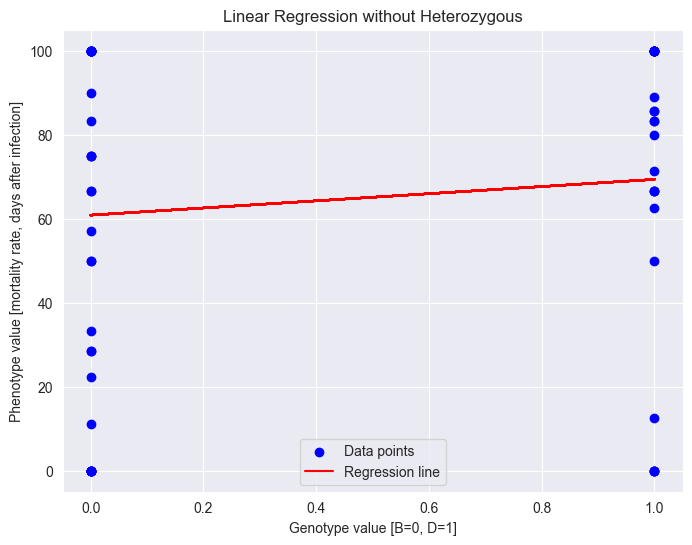

In [36]:
# Plot regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label='Data points', color='b')
plt.plot(X, Yhat, label='Regression line', color='r')
plt.xlabel('Genotype value [B=0, D=1]')
plt.ylabel('Phenotype value [mortality rate, days after infection]') # Infectious disease, immune function: H5N1 influenza A virus mortality rate 30 days after infection (Boon-Webby Trait 1) [% death]
plt.title('Linear Regression without Heterozygous')
plt.grid(True)
plt.legend(['Data points', f'Yhat: {round(b1,3)}*X+{round(b0,3)}', 'Regression line'])
plt.show()

## Q2: simple linear regression model - with heterozygous
#### formalize the model assumptions
#### and calculate P-value scores for the chosen SNP: ```rs13476293```
__________
#### Editing the data
##### Genotypes

In [37]:
# Filter the DataFrame by gen_row
filtered_gen = gen.loc[gen['Locus'].isin(gen_row)]

# Filter columns based on their names - only strains
filtered_gen = filtered_gen.filter(like='BXD')

filtered_gen.head()

,BXD1,BXD2,BXD5,BXD6,BXD8,BXD9,BXD11,BXD12,BXD13,BXD14,...,BXD94,BXD95,BXD96,BXD97,BXD98,BXD99,BXD100,BXD101,BXD102,BXD103
314,B,B,D,D,D,D,B,B,D,D,...,B,H,B,B,D,D,B,U,U,U


##### Phenotypes

In [38]:
# Use .loc to filter the DataFrame by row
filtered_phen = phen.loc[phen.index == phen_row]

# Filter columns based on their names
filtered_phen = filtered_phen.filter(like='BXD')

filtered_phen.head()

,BXD1,BXD2,BXD5,BXD6,BXD8,BXD9,BXD11,BXD12,BXD13,BXD14,...,BXD94,BXD95,BXD96,BXD97,BXD98,BXD99,BXD100,BXD101,BXD102,BXD103
787,66.7,0.0,100.0,50.0,0.0,100.0,0.0,28.6,100.0,100.0,...,NaN,NaN,0.0,100.0,12.5,100.0,11.1,NaN,NaN,NaN


#### Edit dataframes
1. Removing Unknown ('U') values from the dataframes

In [39]:
# Identify columns in filtered_gen that contain values 'U'
columns_with_U = filtered_gen.columns[filtered_gen.isin(['U']).any()]

# Drop these columns from filtered_gen
filtered_gen = filtered_gen.drop(columns_with_U, axis=1)

# Drop these columns from filtered_phen
filtered_phen = filtered_phen.drop(columns_with_U, axis=1)

filtered_gen.head(), filtered_phen.head()

(    BXD1 BXD2 BXD5 BXD6 BXD8 BXD9 BXD11 BXD12 BXD13 BXD14  ... BXD91 BXD92  \
 314    B    B    D    D    D    D     B     B     D     D  ...     B     B   
 
     BXD93 BXD94 BXD95 BXD96 BXD97 BXD98 BXD99 BXD100  
 314     B     B     H     B     B     D     D      B  
 
 [1 rows x 89 columns],
      BXD1  BXD2   BXD5  BXD6  BXD8   BXD9  BXD11  BXD12  BXD13  BXD14  ...  \
 787  66.7   0.0  100.0  50.0   0.0  100.0    0.0   28.6  100.0  100.0  ...   
 
      BXD91  BXD92  BXD93  BXD94  BXD95  BXD96  BXD97  BXD98  BXD99  BXD100  
 787    NaN  100.0    NaN    NaN    NaN    0.0  100.0   12.5  100.0    11.1  
 
 [1 rows x 89 columns])

2. Removing NaN values from the dataframes

In [40]:
# Identify columns in filtered_phen that contain NaN values
columns_with_NaN = filtered_phen.columns[filtered_phen.isna().any()]

# Drop these columns from filtered_gen
filtered_gen = filtered_gen.drop(columns_with_NaN, axis=1)

# Drop these columns from filtered_phen
filtered_phen = filtered_phen.drop(columns_with_NaN, axis=1)

filtered_gen.head(), filtered_phen.head()

(    BXD1 BXD2 BXD5 BXD6 BXD8 BXD9 BXD11 BXD12 BXD13 BXD14  ... BXD86 BXD87  \
 314    B    B    D    D    D    D     B     B     D     D  ...     D     D   
 
     BXD89 BXD90 BXD92 BXD96 BXD97 BXD98 BXD99 BXD100  
 314     D     D     B     B     B     D     D      B  
 
 [1 rows x 66 columns],
      BXD1  BXD2   BXD5  BXD6  BXD8   BXD9  BXD11  BXD12  BXD13  BXD14  ...  \
 787  66.7   0.0  100.0  50.0   0.0  100.0    0.0   28.6  100.0  100.0  ...   
 
      BXD86  BXD87  BXD89  BXD90  BXD92  BXD96  BXD97  BXD98  BXD99  BXD100  
 787   85.7   66.7   85.7   80.0  100.0    0.0  100.0   12.5  100.0    11.1  
 
 [1 rows x 66 columns])

3. Converting the dataframes to numpy arrays

In [41]:
# Convert the filtered_gen DataFrame to a NumPy array
gen_array = np.array(filtered_gen)
# Convert the filtered_phen DataFrame to a NumPy array
phen_array = np.array(filtered_phen)
gen_array, phen_array

(array([['B', 'B', 'D', 'D', 'D', 'D', 'B', 'B', 'D', 'D', 'D', 'B', 'B',
         'B', 'B', 'D', 'D', 'D', 'D', 'B', 'D', 'B', 'D', 'B', 'B', 'B',
         'D', 'D', 'B', 'B', 'B', 'D', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
         'D', 'B', 'B', 'B', 'B', 'H', 'D', 'B', 'B', 'B', 'B', 'H', 'D',
         'B', 'D', 'B', 'B', 'D', 'D', 'D', 'D', 'B', 'B', 'B', 'D', 'D',
         'B']], dtype=object),
 array([[ 66.7,   0. , 100. ,  50. ,   0. , 100. ,   0. ,  28.6, 100. ,
         100. ,  66.7,  33.3, 100. , 100. , 100. , 100. , 100. ,  66.7,
          83.3, 100. ,   0. ,   0. , 100. , 100. , 100. , 100. ,  62.5,
           0. ,  75. , 100. ,   0. ,  83.3,  50. ,  28.6, 100. ,  50. ,
         100. , 100. ,  22.2,  71.4,  66.7,   0. , 100. ,  75. , 100. ,
           0. ,  83.3,  57.1,   0. ,  90. ,  81.8,  88.9,  75. , 100. ,
         100. ,   0. ,  85.7,  66.7,  85.7,  80. , 100. ,   0. , 100. ,
          12.5, 100. ,  11.1]]))

Converting 'B' to 0, 'H' to 1 and 'D' to 2

In [42]:
# Replace 'B' with 0, 'H' with 1 and 'D' with 2 in gen_array
gen_array[gen_array == 'B'] = 0
gen_array[gen_array == 'H'] = 1
gen_array[gen_array == 'D'] = 2
gen_array

array([[0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0,
        2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
        1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0]],
      dtype=object)

# Calculate regression parameters

In [43]:
X = gen_array.astype(int).flatten() # gene vector - independent variable
Y = phen_array.astype(float).flatten() # phenotype vector - dependent variable

Xav = np.mean(X) # mean of X
Yav = np.mean(Y) # mean of Y

Sxx = np.sum(X**2) - len(X) * Xav**2 # sum of squares of X
Sxy = np.dot(X, Y) - len(X) * Xav * Yav # sum of X*Y, dot means element-wise multiplication

b1 = Sxy / Sxx # slope
b0 = Yav - b1 * Xav # intercept
Yhat = X * b1 + b0 # predicted values

print(f'Xav: {Xav}, Yav: {Yav}, Sxx: {Sxx}, Sxy: {Sxy}, b1: {b1}, b0: {b0}, Yhat: X*{round(b1,3)}+{round(b0,3)}')

Xav: 0.8181818181818182, Yav: 65.11818181818184, Sxx: 61.81818181818181, Sxy: 272.2181818181807, b1: 4.403529411764688, b0: 61.515294117647095, Yhat: X*4.404+61.515


# Calculate F-statistic

In [44]:
n = len(X) # number of observations
k = 2 # number of parameters: genotypes and phenotypes

SST = np.sum((Y - Yav)**2) # total sum of squares
SSE = np.sum((Y - Yhat)**2) # error sum of squares
SSR = np.sum((Yhat - Yav)**2)  # regression sum of squares

MST = SST / (n - 1) # mean square total
MSE = SSE / (n - k) # mean square error
MSR = SSR / (k - 1) # mean square regression
F = MSR / MSE # F-statistic

print(f'SST: {SST}, SSE: {SSE}, SSR: {SSR}, MST: {MST}, MSE: {MSE}, MSR: {MSR}, F: {F}')

SST: 97136.35818181818, SSE: 95937.63741176469, SSR: 1198.7207700534675, MST: 1494.4055104895106, MSE: 1499.0255845588233, MSR: 1198.7207700534675, F: 0.7996666517244679


# Calculate degrees of freedom

In [45]:
df1 = k - 1
df2 = n - k
print(f'df1: {df1}, df2: {df2}')

df1: 1, df2: 64


# Calculate p-value

In [46]:
alpha = 0.05
p_value = 1 - stats.f.cdf(F, df1, df2)
print(f'p-value with heterozygous: {p_value}') # p-value > alpha, therefore, cannot reject the null hypothesis

p-value: 0.37454371273161424


# Plot regression line

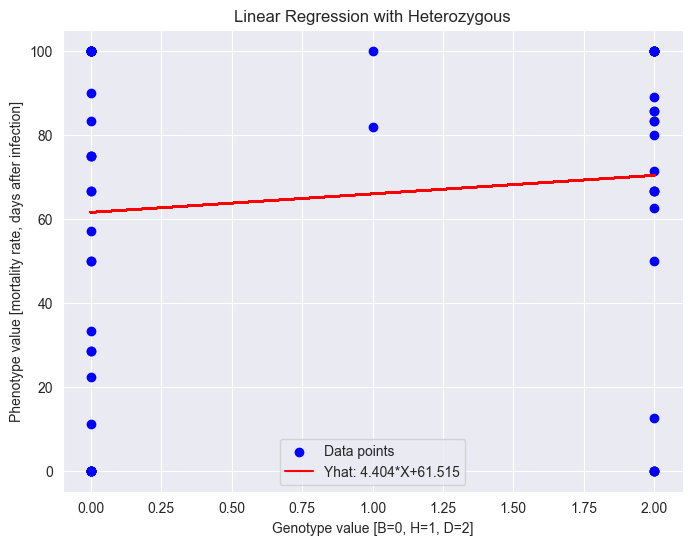

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label='Data points', color='b')
plt.plot(X, Yhat, label='Regression line', color='r')
plt.xlabel('Genotype value [B=0, H=1, D=2]')
plt.ylabel('Phenotype value [mortality rate, days after infection]') # Infectious disease, immune function: H5N1 influenza A virus mortality rate 30 days after infection (Boon-Webby Trait 1) [% death]
plt.title('Linear Regression with Heterozygous')
plt.grid(True)
plt.legend(['Data points', f'Yhat: {round(b1,3)}*X+{round(b0,3)}', 'Regression line'])
plt.show()

## Q3: ANOVA model - without heterozygous
#### formalize the model assumptions
#### and calculate P-value scores for the chosen SNP: ```rs13476293```
__________
#### Editing the data
##### Genotypes

In [79]:
# Filter the DataFrame by gen_row
filtered_gen = gen.loc[gen['Locus'].isin(gen_row)]

# Filter columns based on their names - only strains
filtered_gen = filtered_gen.filter(like='BXD')

filtered_gen.head()

,BXD1,BXD2,BXD5,BXD6,BXD8,BXD9,BXD11,BXD12,BXD13,BXD14,...,BXD94,BXD95,BXD96,BXD97,BXD98,BXD99,BXD100,BXD101,BXD102,BXD103
314,B,B,D,D,D,D,B,B,D,D,...,B,H,B,B,D,D,B,U,U,U


##### Phenotypes

In [80]:
# Use .loc to filter the DataFrame by row
filtered_phen = phen.loc[phen.index == phen_row]

# Filter columns based on their names
filtered_phen = filtered_phen.filter(like='BXD')

filtered_phen.head()

,BXD1,BXD2,BXD5,BXD6,BXD8,BXD9,BXD11,BXD12,BXD13,BXD14,...,BXD94,BXD95,BXD96,BXD97,BXD98,BXD99,BXD100,BXD101,BXD102,BXD103
787,66.7,0.0,100.0,50.0,0.0,100.0,0.0,28.6,100.0,100.0,...,NaN,NaN,0.0,100.0,12.5,100.0,11.1,NaN,NaN,NaN


#### Edit dataframes
1. Removing the heterozygous ('H') and Unknown ('U') genotypes from both dataframes

In [81]:
# Identify columns in filtered_gen that contain values other than 'B' or 'D'
columns_with_other_values = filtered_gen.columns[~filtered_gen.isin(['B', 'D']).all()]

# Drop these columns from filtered_gen
filtered_gen = filtered_gen.drop(columns_with_other_values, axis=1)

# Drop these columns from filtered_phen
filtered_phen = filtered_phen.drop(columns_with_other_values, axis=1)

filtered_gen.head(), filtered_phen.head()

(    BXD1 BXD2 BXD5 BXD6 BXD8 BXD9 BXD11 BXD12 BXD13 BXD14  ... BXD90 BXD91  \
 314    B    B    D    D    D    D     B     B     D     D  ...     D     B   
 
     BXD92 BXD93 BXD94 BXD96 BXD97 BXD98 BXD99 BXD100  
 314     B     B     B     B     B     D     D      B  
 
 [1 rows x 82 columns],
      BXD1  BXD2   BXD5  BXD6  BXD8   BXD9  BXD11  BXD12  BXD13  BXD14  ...  \
 787  66.7   0.0  100.0  50.0   0.0  100.0    0.0   28.6  100.0  100.0  ...   
 
      BXD90  BXD91  BXD92  BXD93  BXD94  BXD96  BXD97  BXD98  BXD99  BXD100  
 787   80.0    NaN  100.0    NaN    NaN    0.0  100.0   12.5  100.0    11.1  
 
 [1 rows x 82 columns])

2. Removing NaN values from the dataframes

In [82]:
# Identify columns in filtered_phen that contain NaN values
columns_with_NaN = filtered_phen.columns[filtered_phen.isna().any()]

# Drop these columns from filtered_gen
filtered_gen = filtered_gen.drop(columns_with_NaN, axis=1)

# Drop these columns from filtered_phen
filtered_phen = filtered_phen.drop(columns_with_NaN, axis=1)

filtered_gen.head(), filtered_phen.head()

(    BXD1 BXD2 BXD5 BXD6 BXD8 BXD9 BXD11 BXD12 BXD13 BXD14  ... BXD86 BXD87  \
 314    B    B    D    D    D    D     B     B     D     D  ...     D     D   
 
     BXD89 BXD90 BXD92 BXD96 BXD97 BXD98 BXD99 BXD100  
 314     D     D     B     B     B     D     D      B  
 
 [1 rows x 64 columns],
      BXD1  BXD2   BXD5  BXD6  BXD8   BXD9  BXD11  BXD12  BXD13  BXD14  ...  \
 787  66.7   0.0  100.0  50.0   0.0  100.0    0.0   28.6  100.0  100.0  ...   
 
      BXD86  BXD87  BXD89  BXD90  BXD92  BXD96  BXD97  BXD98  BXD99  BXD100  
 787   85.7   66.7   85.7   80.0  100.0    0.0  100.0   12.5  100.0    11.1  
 
 [1 rows x 64 columns])

Organizing the data for genotype 'B'

In [70]:
# Identify columns in filtered_gen that contain values 'D'
columns_with_D = filtered_gen.columns[filtered_gen.isin(['D']).any()]

# Drop these columns from filtered_gen
filtered_gen_b = filtered_gen.drop(columns_with_D, axis=1)

# Drop these columns from filtered_phen
filtered_phen_b = filtered_phen.drop(columns_with_D, axis=1)

filtered_gen_b.head(), filtered_phen_b.head()

(    BXD1 BXD2 BXD11 BXD12 BXD16 BXD18 BXD19 BXD20 BXD28 BXD31  ... BXD70  \
 314    B    B     B     B     B     B     B     B     B     B  ...     B   
 
     BXD71 BXD73 BXD80 BXD84 BXD85 BXD92 BXD96 BXD97 BXD100  
 314     B     B     B     B     B     B     B     B      B  
 
 [1 rows x 38 columns],
      BXD1  BXD2  BXD11  BXD12  BXD16  BXD18  BXD19  BXD20  BXD28  BXD31  ...  \
 787  66.7   0.0    0.0   28.6   33.3  100.0  100.0  100.0  100.0    0.0  ...   
 
      BXD70  BXD71  BXD73  BXD80  BXD84  BXD85  BXD92  BXD96  BXD97  BXD100  
 787   57.1    0.0   90.0   75.0  100.0    0.0  100.0    0.0  100.0    11.1  
 
 [1 rows x 38 columns])

3. Converting the dataframes to numpy arrays

In [76]:
# Convert the filtered_gen DataFrame to a NumPy array
Xb = np.array(filtered_gen_b)

# Convert the filtered_phen DataFrame to a NumPy array
Yb = np.array(filtered_phen_b)

Xb, Yb

(array([['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
         'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
         'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']],
       dtype=object),
 array([[ 66.7,   0. ,   0. ,  28.6,  33.3, 100. , 100. , 100. , 100. ,
           0. , 100. , 100. , 100. ,  75. , 100. ,   0. ,  50. ,  28.6,
         100. ,  50. , 100. , 100. ,  22.2,  66.7,   0. , 100. ,  75. ,
          83.3,  57.1,   0. ,  90. ,  75. , 100. ,   0. , 100. ,   0. ,
         100. ,  11.1]]))

# Calc parameters for genotype 'B'

In [77]:
# flatten the data
Yb = Yb.flatten()
nb = len(Yb) # number of observations for genotype 'B'
AVb = np.mean(Yb) # mean of phenotype for genotype 'B'
print(f'Number of observations for genotype B: {nb}', f'Mean of phenotype for genotype B: {AVb}')

Number of observations for genotype B: 38 Mean of phenotype for genotype B: 60.857894736842105


Organizing the data for genotype 'D'

In [83]:
# Identify columns in filtered_gen that contain values 'B'
columns_with_B = filtered_gen.columns[filtered_gen.isin(['B']).any()]

# Drop these columns from filtered_gen
filtered_gen_d = filtered_gen.drop(columns_with_B, axis=1)

# Drop these columns from filtered_phen
filtered_phen_d = filtered_phen.drop(columns_with_B, axis=1)

filtered_gen_d.head(), filtered_phen_d.head()

(    BXD5 BXD6 BXD8 BXD9 BXD13 BXD14 BXD15 BXD21 BXD22 BXD23  ... BXD61 BXD68  \
 314    D    D    D    D     D     D     D     D     D     D  ...     D     D   
 
     BXD77 BXD83 BXD86 BXD87 BXD89 BXD90 BXD98 BXD99  
 314     D     D     D     D     D     D     D     D  
 
 [1 rows x 26 columns],
       BXD5  BXD6  BXD8   BXD9  BXD13  BXD14  BXD15  BXD21  BXD22  BXD23  ...  \
 787  100.0  50.0   0.0  100.0  100.0  100.0   66.7  100.0  100.0   66.7  ...   
 
      BXD61  BXD68  BXD77  BXD83  BXD86  BXD87  BXD89  BXD90  BXD98  BXD99  
 787   71.4    0.0   88.9  100.0   85.7   66.7   85.7   80.0   12.5  100.0  
 
 [1 rows x 26 columns])

3. Converting the dataframes to numpy arrays

In [84]:
# Convert the filtered_gen DataFrame to a NumPy array
Xd = np.array(filtered_gen_d)

# Convert the filtered_phen DataFrame to a NumPy array
Yd = np.array(filtered_phen_d)

Xd, Yd

(array([['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
         'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D']],
       dtype=object),
 array([[100. ,  50. ,   0. , 100. , 100. , 100. ,  66.7, 100. , 100. ,
          66.7,  83.3,   0. , 100. ,  62.5,   0. ,  83.3,  71.4,   0. ,
          88.9, 100. ,  85.7,  66.7,  85.7,  80. ,  12.5, 100. ]]))

# Calc parameters for genotype 'D'

In [85]:
# flatten the data
Yd = Yd.flatten()
nd = len(Yd) # number of observations for genotype 'D'
AVd = np.mean(Yd) # mean of phenotype for genotype 'D'
print(f'Number of observations for genotype D: {nd}', f'Mean of phenotype for genotype D: {AVd}')

Number of observations for genotype D: 26 Mean of phenotype for genotype D: 69.36153846153846


# General parameters

In [93]:
# calc total sample size
ntot = len(Yb) + len(Yd)

# calc the mean of all phenotypes
AVtot = np.mean(np.concatenate((Yb, Yd)))

# number groups
a = 2 # 1 is phen of B, 2 is phen of D

# degrees of freedom
df_among = a - 1
df_within = ntot - a
df_total = ntot - 1

print(f'Total sample size: {ntot}, Mean of all phenotypes: {AVtot}, Number of groups: {a},\n df among: {df_among}, df within: {df_within}, df total: {df_total}')

Total sample size: 64, Mean of all phenotypes: 64.3125, Number of groups: 2,
 df among: 1, df within: 62, df total: 63


# Calculate the sum of squares for the model

In [90]:
SSamong = nb * (AVb - AVtot)**2 + nd * (AVd - AVtot)**2
SSwithin = np.sum((Yb - AVb)**2) + np.sum((Yd - AVd)**2)
SStot = np.sum((np.concatenate((Yb, Yd)) - AVtot)**2)

print(f'SSamong: {round(SSamong,3)}, SSwithin: {round(SSwithin,3)}, SStot: {round(SStot,3)}')

SSamong: 1116.316, SSwithin: 94483.474, SStot: 95599.79


# Calculate the Mean of Squares

In [94]:
MSamong = SSamong / df_among
MSwithin = SSwithin / df_within
MStot = SStot / df_total

print(f'MSamong: {round(MSamong,3)}, MSwithin: {round(MSwithin,3)}, MStot: {round(MStot,3)}')

MSamong: 1116.316, MSwithin: 1523.927, MStot: 1517.457


# Calculate the F-statistic

In [95]:
F = MSamong / MSwithin
p_value = 1 - stats.f.cdf(F, df_among, df_within)

print(f'F-statistic: {round(F,3)}, p-value: {p_value}') # p-value > alpha, therefore, cannot reject the null hypothesis

F-statistic: 0.733, p-value: 0.39536139653406877
